In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [8]:
from utils import *

In [30]:
data = load_data('../../data/vehicle_insurance/fraud_oracle.csv')
categorical_cols =  ['Make', 'AccidentArea',	'Sex',	'MaritalStatus',	'Fault', 'PolicyType',
                    	'VehicleCategory',	'Deductible',	'Days_Policy_Accident',	'Days_Policy_Claim',
            	        'AgeOfVehicle',  'AgeOfPolicyHolder', 'PoliceReportFiled',	'WitnessPresent',
                	   'AgentType',	'NumberOfSuppliments',	'AddressChange_Claim', 'VehiclePrice',
                       'PastNumberOfClaims', 'NumberOfCars', 'BasePolicy', 'Month', 'MonthClaimed',
                       'DayOfWeek', 'DayOfWeekClaimed']

In [31]:
X = data
Y = get_labels(data, "vehicle_insurance")

In [14]:
X_num = X
Y = Y
X_num = remove_cols(X_num, categorical_cols)

**Numerical Cols**

In [15]:
X_num = normalize_cols(X_num)
X_num_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_num)

In [16]:
X_num["tsne_one"] = X_num_embedded[:,0]
X_num["tsne_two"] = X_num_embedded[:,1]
X_num["y"] = Y

<AxesSubplot:xlabel='tsne_one', ylabel='tsne_two'>

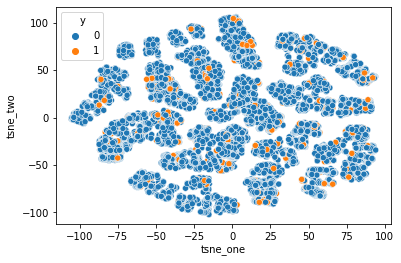

In [17]:
 sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_num,
    legend="full",
    alpha=1
)

**Label Encoding**

In [20]:
X_label = label_encoding(X, categorical_cols)
X_label = normalize_cols(X_label)
X_label = X_label

In [21]:
X_label_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_label)

In [22]:
X_label["tsne_one"] = X_label_embedded[:,0]
X_label["tsne_two"] = X_label_embedded[:,1]
X_label["y"] = Y

<AxesSubplot:xlabel='tsne_one', ylabel='tsne_two'>

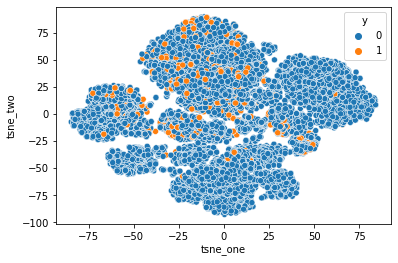

In [23]:
sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_label,
    legend="full",
    alpha=1
)

**GEL Encoding**

In [26]:
X_gel = gel_encoding(X, categorical_cols)
X_gel = normalize_cols(X_gel)

C:\Users\ajayc\anaconda3\envs\thesis\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ajayc\anaconda3\envs\thesis\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [27]:
X_gel_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_gel)

In [28]:
X_gel["tsne_one"] = X_gel_embedded[:,0]
X_gel["tsne_two"] = X_gel_embedded[:,1]
X_gel["y"] = Y

<AxesSubplot:xlabel='tsne_one', ylabel='tsne_two'>

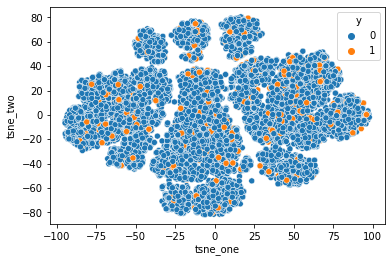

In [29]:
sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_gel,
    legend="full",
    alpha=1
)

**One Hot**

In [32]:
X_oh = X
X_oh = one_hot_encoding(X_oh, categorical_cols)
X_oh = normalize_cols(X_oh)

In [33]:
X_oh_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_oh)

In [34]:
X_oh["tsne_one"] = X_oh_embedded[:,0]
X_oh["tsne_two"] = X_oh_embedded[:,1]
X_oh["y"] = Y

<AxesSubplot:xlabel='tsne_one', ylabel='tsne_two'>

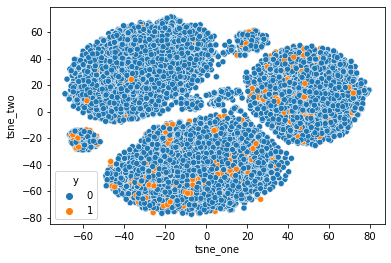

In [35]:
 sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_oh,
    legend="full",
    alpha=1
)

Text(0.5, 1.0, 'One hot Encoding')

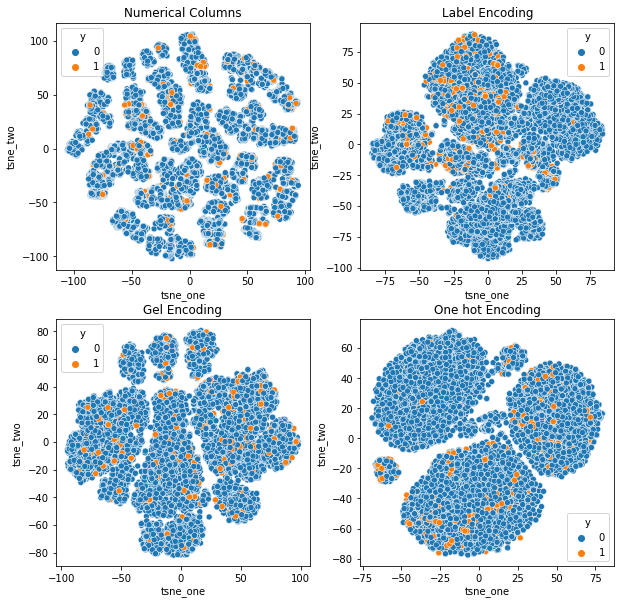

In [36]:
f, ax = plt.subplots(2,2, figsize = [10,10])
sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_num,
    legend="full",
    alpha=1, ax= ax[0,0]
)
sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_label,
    legend="full",
    alpha=1, ax=ax[0,1]
)
sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_gel,
    legend="full",
    alpha=1, ax=ax[1,0]
)
sns.scatterplot(
    x= "tsne_one", y= "tsne_two",
    hue="y",
    data=X_oh,
    legend="full",
    alpha=1, ax=ax[1,1]
)
ax[0][0].set_title("Numerical Columns")
ax[0][1].set_title("Label Encoding")
ax[1][0].set_title("Gel Encoding")
ax[1][1].set_title("One hot Encoding")